<div>
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td align="left"; style="background-color:transparent; width: 50%;"><a href="https://www.ip-paris.fr/"><img src="https://www.telecom-paris.fr/wp-content-EvDsK19/uploads/2019/07/5ecolesIPParis.png" width="50%"></a></td>
  </tr>
</table> 
</div>


<center><h1>Sign Language challenge </h1></center>

<center><h3>A data challenge on predicting the word from a performed video of the corresponding sign</h3></center>
<br/>
<center><i>Yanis Moudere, Matthieu Le Cossec, Abdellahi Elemine Vall, Samy Mdihi, Thomas Flourent, Timothé Guillaume-Li</i></center>

# 1. Introduction

The WLASL is a dataset of videos of people performing American Sign Language (ASL) gestures for individual words. It's a valuable resource for researchers and developers working on sign language recognition and translation.

With more than 2,000 unique signs and over 20,000 video clips performed by 260 signers, it provides a large and diverse set of training and testing data. The videos are captured in a variety of settings, including indoor and outdoor environments, with a range of lighting conditions, camera angles, and signers of different ages and genders.

The goal of this challenge is to challenge participants to develop machine learning models that can accurately predict sign language gestures in video sequences from the WLASL (Word-Level American Sign Language) dataset. The development of new and innovative methods for recognizing sign language, which could ultimately help to improve communication and accessibility for individuals who use sign language as their primary means of communication.

Participants will use Python to develop their machine learning models, and will be evaluated based on their models' accuracy in predicting the correct sign language word for a given video sequence.



<div>
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">    
    <td align="center"; style="background-color:transparent; width: 33%;"><a href = "https://dxli94.github.io/WLASL/"><img src="https://www.researchgate.net/publication/363883283/figure/fig1/AS:11431281086755268@1664296771231/Inconsistent-WLASL-gloss-labels-examples-the-American-Sign-Language-Lexicon-Video.ppm" width="50%"></a></td>
    
</table> 
</div>

<center><b>Fig.1 - Overview of the types of videos that are available for the challenge. These videos come from WLASL dataset, are generally 1 to 5 seconds long with a great variety of signers for each of the 2000 words available. Each video has a label that contains the word that is expressed.</b></center

## 2. Setup

### Prerequisites

The following cell will install the required package dependencies, if necessary. You can examine the file, `requirements.txt`, included in the repo to view the list of dependencies.

In [1]:
import sys
#!{sys.executable} -m pip install -r requirements.txt
# -> Il faut écrire le requirements.txt

Install the `ramp-workflow` package from PyPI using the following command in you dedicated python environment.

```pip install ramp-workflow```

### The problem.py file

This file contains the definition of the data-challenge according to the RAMP framework. In addition, it contains some useful methods and class.

In [2]:
#from problem import get_train_data, get_test_data, WeightedClassificationError
# -> Ligne de code à adapter à notre problem.py

## Downloading the data

The WLASL videos are publicly available data that can be downloaded from kaggle. From here, there is two solutions :
- run the following script which create the `data/` repository locally.

```python download_data.py``` (pas encore créé)

- Click the following link from Kaggle : https://www.kaggle.com/datasets/risangbaskoro/wlasl-processed/download?datasetVersionNumber=5 , and unzip the folder in a manually created `data/` local repository. The videos should be in a `raw_videos` folder.

After running this command you will have all the raw videos stored in the data/raw_videos file. 

Note that since the videos are downloaded from the internet using links, some videos could be no more available on the same link as before so it's normal if some videos were skipped during the download.

## 3. The Dataset description

In the data folder, you will find the json file **WLASL_v0.3.json** that describes the dataset. This json file contains two objects for each word in the dataset. The first is the **gloss** which is the corresponding English word, and **instances** which is a list of dictionary objects that describe each video of that word. 

Each instance contains the information needed to download the video instance from the internet, but also the signer's ID and in which split (train or test) to put these instances. The splitting was done with the goal of balancing the training and test sets in terms of word frequencies, frame lengths, signers diversity, etc.

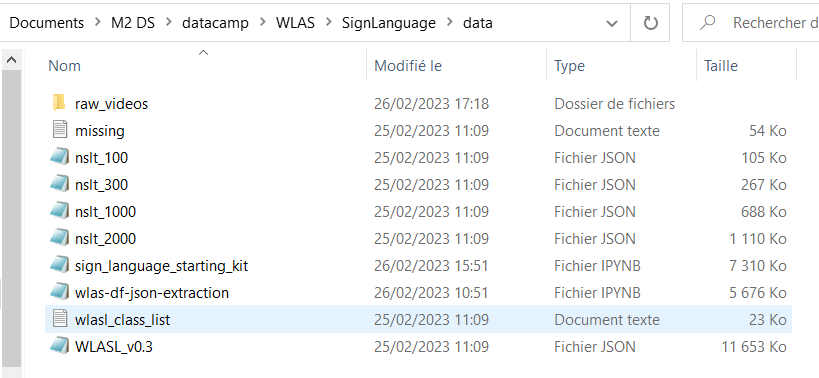

## 4. Data exploration

In this part, we will explore the **WLASL_v0.3.json** file that describes the dataset, but also the how to visualize the videos that are available to us in the `raw_videos` folder.

In [1]:
import numpy as np 
import pandas as pd 
import json
import os

Read the .json file that should be in the `data` folder in the current repository.

In [2]:
wlas_df = pd.read_json('data/WLASL_v0.3.json')

In [3]:
wlas_df.head()

gloss                                          instances
0      book  [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...
1     drink  [{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...
2  computer  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
3    before  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
4     chair  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...

In [4]:
wlas_df['gloss']

0             book
1            drink
2         computer
3           before
4            chair
           ...    
1995    washington
1996     waterfall
1997         weigh
1998    wheelchair
1999       whistle
Name: gloss, Length: 2000, dtype: object

As mentionned previously this `WLASL_v0.3.json` file describes the 2000 different words that are in the dataset. The words are stored in the 'gloss' column, and the 'instances' column correspond to a list of dictionnaries that describe each videos (id, number of frames, source, ...).

In [5]:
wlas_df['count_vid'] = wlas_df['instances'].apply(len)
wlas_df

gloss                                          instances  count_vid
0           book  [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...         40
1          drink  [{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...         35
2       computer  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...         30
3         before  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...         26
4          chair  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...         26
...          ...                                                ...        ...
1995  washington  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...          7
1996   waterfall  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...          7
1997       weigh  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...          7
1998  wheelchair  [{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...          7
1999     whistle  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...          7

[2000 rows x 3 columns]

For each word in the gloss, we have different number of videos. However, all videos are not available in the dataset, the following get_videos_ids function returns for each word the videos that are indeed available.

In [17]:
def get_videos_ids(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_list = []    
    for ins in json_list:
        video_id = ins['video_id']
        if os.path.exists(f'data/raw_videos/{video_id}.mp4'):
            videos_list.append(video_id)
    return videos_list

In [18]:
with open('data/WLASL_v0.3.json', 'r') as data_file:
    json_data = data_file.read()

instance_json = json.loads(json_data)

In [99]:
import os

# Load the dataset from the JSON file
with open('data/WLASL_v0.3.json') as f:
    data = json.load(f)
    

Let's have a look at the histogram of the theoretical frequency distribution in the dataset.

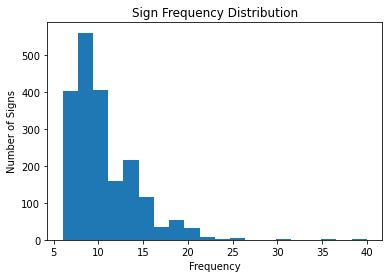

In [100]:
# Get the sign labels and frequencies
labels = [d['gloss'] for d in data]
frequencies = [len(d['instances']) for d in data]

# Plot the histogram
plt.hist(frequencies, bins=20)
plt.xlabel('Frequency')
plt.ylabel('Number of Signs')
plt.title('Sign Frequency Distribution')
plt.show()

Now let's count how many videos are missing in our dataset.

In [102]:
# Check for missing video files
count_missing = 0
for gloss in data:
    for sign in gloss['instances']:
        video_file = sign['video_id']
        if not os.path.exists(f'data/raw_videos/{video_file}.mp4'):
            count_missing += 1
print('Missing {} videos'.format(count_missing))

Missing 9103 videos


As we can see, compared to the initial dataset, 9103 videos are now missing. Let's check the number of available videos in the dataset for the first word 'book'.

In [103]:
len(get_videos_ids(instance_json[0]['instances']))

6

The `get_videos_ids` method is used to get the video ids that are actually available in the dataset, let's add a column to our `wlas_df` that lists for each word the video ids that are available.

In [104]:
get_videos_ids(instance_json[0]['instances'])

['69241', '07069', '07068', '07070', '07099', '07074']

In [105]:
wlas_df['videos_ids'] = wlas_df['instances'].apply(get_videos_ids)

In [106]:
wlas_df

gloss                                          instances  \
0           book  [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...   
1          drink  [{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...   
2       computer  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
3         before  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
4          chair  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
...          ...                                                ...   
1995  washington  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
1996   waterfall  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
1997       weigh  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
1998  wheelchair  [{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...   
1999     whistle  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   

      count_vid                                         videos_ids  \
0            40         [69241, 07069, 07068, 07070, 07099, 07074]   
1            35  [69302, 65539, 17710, 17733, 65540, 17734, 177...   
2            30  [12328, 12312, 12311, 12338, 12313, 12314, 123...   
3            26  [05728, 05749, 05750, 05729, 05730, 65167, 057...   
4            26  [09848, 09869, 09849, 09850, 09851, 65328, 09854]   
...         ...                                                ...   
1995          7                [62393, 62394, 62395, 62396, 62398]   
1996          7                [62488, 62489, 62490, 62492, 62493]   
1997          7                              [62782, 62783, 62785]   
1998          7                       [63044, 63046, 63047, 63050]   
1999          7                              [63186, 63188, 63190]   

      samples_num  
0               6  
1              15  
2              14  
3              16  
4               7  
...           ...  
1995            5  
1996            5  
1997            3  
1998            4  
1999            3  

[2000 rows x 5 columns]

The following `get_json_features` allow us to build a dataframe only with the videos that are available, with the label and the url to find the videos.

In [24]:
def get_json_features(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids and url or any other featrue of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_ids = []
    videos_urls = []
    for ins in json_list:
        video_id = ins['video_id']
        video_url = ins['url']
        if os.path.exists(f'data/raw_videos/{video_id}.mp4'):
            videos_ids.append(video_id)
            videos_urls.append(video_url)
    return videos_ids, videos_urls

In [25]:
features_df = pd.DataFrame(columns=['gloss', 'video_id', 'url'])
for row in wlas_df.iterrows():
#     print(row[1][1])
    ids, urls = get_json_features(row[1][1])
    word = [row[1][0]] * len(ids)
    df = pd.DataFrame(list(zip(word, ids, urls)), columns = features_df.columns)
    features_df = features_df.append(df, ignore_index=True)

C:\Users\a882436\AppData\Local\Temp\ipykernel_28352\40032862.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(df, ignore_index=True)


In [26]:
features_df

gloss video_id                                                url
0            book    69241       http://aslbricks.org/New/ASL-Videos/book.mp4
1            book    07069  https://signstock.blob.core.windows.net/signsc...
2            book    07068  https://s3-us-west-1.amazonaws.com/files.start...
3            book    07070  https://media.asldeafined.com/vocabulary/14666...
4            book    07099     http://www.aslsearch.com/signs/videos/book.mp4
...           ...      ...                                                ...
11975  wheelchair    63047  https://www.signingsavvy.com/signs/mp4/5/5233.mp4
11976  wheelchair    63050  http://www.aslsearch.com/signs/videos/wheelcha...
11977     whistle    63186  https://media.spreadthesign.com/video/mp4/13/9...
11978     whistle    63188  https://www.signingsavvy.com/signs/mp4/9/9961.mp4
11979     whistle    63190  http://www.aslsearch.com/signs/videos/whistle.mp4

[11980 rows x 3 columns]

### Task dataframe

In [27]:
features_df.index.name = 'index'
features_df

gloss video_id                                                url
index                                                                        
0            book    69241       http://aslbricks.org/New/ASL-Videos/book.mp4
1            book    07069  https://signstock.blob.core.windows.net/signsc...
2            book    07068  https://s3-us-west-1.amazonaws.com/files.start...
3            book    07070  https://media.asldeafined.com/vocabulary/14666...
4            book    07099     http://www.aslsearch.com/signs/videos/book.mp4
...           ...      ...                                                ...
11975  wheelchair    63047  https://www.signingsavvy.com/signs/mp4/5/5233.mp4
11976  wheelchair    63050  http://www.aslsearch.com/signs/videos/wheelcha...
11977     whistle    63186  https://media.spreadthesign.com/video/mp4/13/9...
11978     whistle    63188  https://www.signingsavvy.com/signs/mp4/9/9961.mp4
11979     whistle    63190  http://www.aslsearch.com/signs/videos/whistle.mp4

[11980 rows x 3 columns]

### In this dataframe we have for each word, all the videos that are available. At total, we have 11980 videos in our dataset.

In [28]:
wlas_df['samples_num'] = wlas_df['videos_ids'].apply(len)

In [29]:
wlas_df

gloss                                          instances  \
0           book  [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...   
1          drink  [{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...   
2       computer  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
3         before  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
4          chair  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
...          ...                                                ...   
1995  washington  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
1996   waterfall  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
1997       weigh  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   
1998  wheelchair  [{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...   
1999     whistle  [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...   

      count_vid                                         videos_ids  \
0            40         [69241, 07069, 07068, 07070, 07099, 07074]   
1            35  [69302, 65539, 17710, 17733, 65540, 17734, 177...   
2            30  [12328, 12312, 12311, 12338, 12313, 12314, 123...   
3            26  [05728, 05749, 05750, 05729, 05730, 65167, 057...   
4            26  [09848, 09869, 09849, 09850, 09851, 65328, 09854]   
...         ...                                                ...   
1995          7                [62393, 62394, 62395, 62396, 62398]   
1996          7                [62488, 62489, 62490, 62492, 62493]   
1997          7                              [62782, 62783, 62785]   
1998          7                       [63044, 63046, 63047, 63050]   
1999          7                              [63186, 63188, 63190]   

      samples_num  
0               6  
1              15  
2              14  
3              16  
4               7  
...           ...  
1995            5  
1996            5  
1997            3  
1998            4  
1999            3  

[2000 rows x 5 columns]

In [30]:
print("minimum number of samples for a word:", wlas_df['samples_num'].min())
print("maximum number of samples for a word:", wlas_df['samples_num'].max())

minimum number of samples for a word: 2
maximum number of samples for a word: 16


In [31]:
words_sample_counts = wlas_df[['gloss', 'samples_num']].groupby('samples_num').agg({"gloss":['count', ', '.join]})

Here we have the number of samples that go from 2 to 16, and for each, the words that have this amount of samples in the dataset

In [32]:
words_sample_counts

gloss                                                   
            count                                               join
samples_num                                                         
2              14  gloves, careless, wash face, curtain, grey, la...
3              76  garage, parents, boots, excuse, furniture, rep...
4             335  hello, newspaper, asl, that, will, cards, hate...
5             511  clothes, table, movie, clock, pencil, behind, ...
6             402  book, birthday, need, have, knife, read, name,...
7             307  chair, dance, eat, forget, but, jacket, paint,...
8             151  all, blue, hearing, wrong, color, enjoy, time,...
9             100  fine, finish, now, can, hat, kiss, cow, meet, ...
10             48  year, black, hot, like, many, orange, fish, gr...
11             26  deaf, no, walk, mother, woman, dog, family, ap...
12             13  yes, what, later, man, shirt, change, corn, da...
13              8  candy, thanksgiving, bed, bowling, tall, accid...
14              4                        computer, who, cousin, help
15              2                                          drink, go
16              3                                 before, thin, cool

### Data visualization

Let's take a look at one of the videos, you can use the functions **get_video_path** and **read_video** and **plot_video_frames** from **problem.py**. The first function gives you the path of the first available video of a given word, and the second read the video frames in numpy array format, and the last one plot you images from that video. 

In [37]:
from problem import read_video

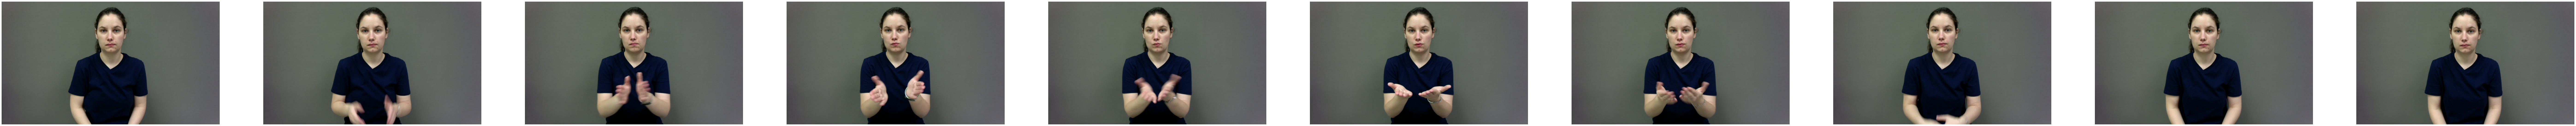

In [38]:
import matplotlib.pyplot as plt
import numpy as np

from problem import read_video, get_video_path, plot_video_frames

# get the video path and read the video
word = 'book'
path_to_video = get_video_path(word, data)
video = read_video(path_to_video)

# plot the video frames
plot_video_frames(video)


### Label encoder

By running the following cell, we get the labels and encode them. We then store in a dictionnary the labels with 

In [45]:
import json
from sklearn.preprocessing import LabelEncoder
import pandas as pd
with open('data/WLASL_v0.3.json') as f:
    data = json.load(f)
    
# get the labels
for gloss in data:
    labels.append(gloss['gloss'])

# encode the labels

labels_encoded = LabelEncoder().fit_transform(labels)

# create a dictionary of labels and their encoded values

labels_dict = dict(zip(labels, labels_encoded))

# save the dictionary as a json file

import pickle 

with open('data/labels_dict.pkl', 'wb') as f:
    pickle.dump(labels_dict, f)

## Create The Dataset

In order to train and test our model we need to split our data into a train and a test test.
To do this we will impute the methods `get_train_data` and `get_test_data` from **problem.py**

torch.Size([16, 100, 3, 224, 224])


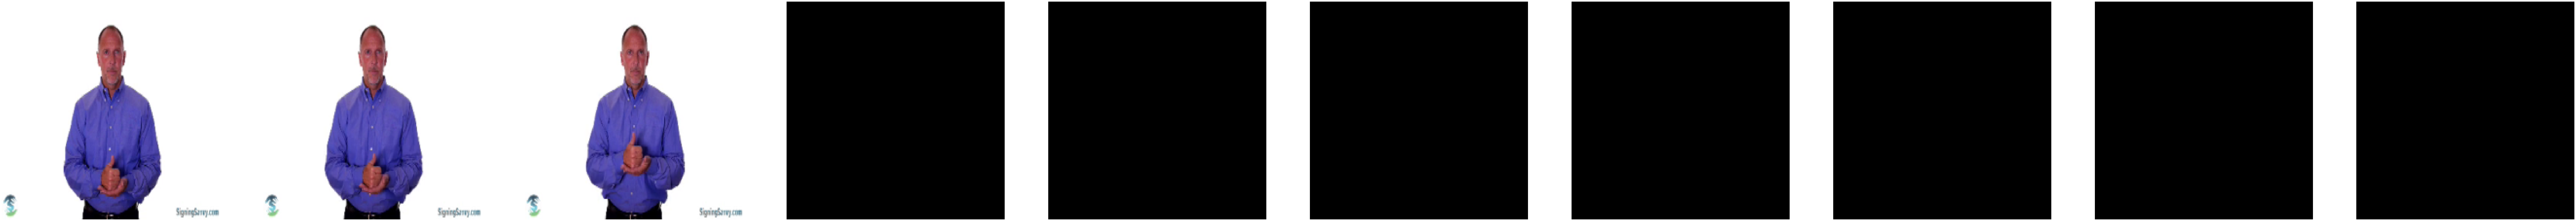

In [46]:
from problem import get_train_data, get_test_data, WLSLDataset
import torch

# get the training data
paths, labels = get_train_data()

# crate the dataset
dataset = WLSLDataset(paths, labels, max_frames=100)

# create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

# iterate over the dataloader
for batch in dataloader:
    imgs, labels = batch
    print(imgs.shape)
    break

# plot a video
video = imgs[0].permute(0, 2, 3, 1).numpy()
plot_video_frames(video)


We fix the maximum number of frames for the videos of the dataset to 100. Most of these videos have 25 frames per second, therefore, this generally corresponds to a 4 seconds video.

## Loading our Classifier

### Illustration

In order to create our model, we need to import our classifier that is implemented in `./subsmissions/starting_kit/` and we copy its code here for illustration.

In [108]:
from sklearn.base import BaseEstimator
class Classifier(BaseEstimator):

    def fit(self, X, y, nb_epochs = 1):
        self.dataset = WLSLDataset(X, y, max_frames=34)
        dataloader = torch.utils.data.DataLoader(self.dataset, batch_size=32, shuffle=True)
        criterion = nn.CrossEntropyLoss()
        #self.model = Net(nb_classes = self.dataset.nb_classes)
        # use the video classifier
        self.model = VideoClassifier()
        optimizer = optim.Adam(self.model.parameters(), lr=0.01)
  
        for i, data in enumerate(dataloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = self.model(inputs)

            loss = criterion(outputs, labels)#.to(torch.float32))
            loss.backward()
            optimizer.step()
            break

        return self

    def predict_proba(self, X):
        videos_tensor = torch.zeros((len(X), self.dataset.max_frames,3, 224, 224))
        for j, path in enumerate(X) :
            cap = cv2.VideoCapture(path)
            
            # Loop through the frames
            i = 0
            while(cap.isOpened()):
                ret, frame = cap.read()
                if ret == False or i>=self.dataset.max_frames:
                    break  
                # convert to RGB
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frame_transformed = self.dataset.transform(Image.fromarray(frame))
                videos_tensor[j, i] = frame_transformed
                i += 1
            # Release the video capture object
            cap.release()
        return self.model(videos_tensor)
        


    def predict(self, X):
        probas = self.predict_proba(X)
        most_likely_outputs = torch.argmax(probas, axis = 1)
        #predictions = torch.zeros_like(probas)
        #for i, most_likely_output in enumerate(most_likely_outputs) :
        #    predictions[i,most_likely_output] = 1
        return most_likely_outputs

We define our dummy model and we use `get_train_data` to get our training data, that we fit the model on. 

In [97]:
from submissions.starting_kit.estimator import Classifier
model = Classifier()
X, y = get_train_data()
model.fit(X,y)

Classifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [90]:
X, y = get_test_data()
X = X[:10]
y = y[:10]

Here, the X are the features and they are stored as path to the videos.

In [91]:
X[:5]

['data/raw_videos/17713.mp4',
 'data/raw_videos/12320.mp4',
 'data/raw_videos/05727.mp4',
 'data/raw_videos/05739.mp4',
 'data/raw_videos/05741.mp4']

y contains the target values, they correspond to encoded values of the labels.

In [92]:
y[:5]

[2566, 2390, 2166, 2166, 2166]

In [93]:
probas = model.predict_proba(X)

In [95]:
predictions = model.predict(X).tolist()
predictions

tensor([2644, 2644, 3579, 2644, 3579, 2644, 2644, 3579, 3579, 2644])


AttributeError: 'WLSLDataset' object has no attribute 'ohe'

# EVERYTHING BELOW NEEDS TO BE ADAPTED

#### Score function (TO BE ADAPTED)

For a a given prediction time (in HAF) your prediction score will be a classification **error**: the LOWER the better. Moreover, not all mistakes costs the same for this problem, as some classes are more "distinct" than others. Thus, we use a weight matrix $W$ where the weights were determined by an expert and we give the matrix $W$ below.

The formula of the weighted classification error for a hard label $y_i \in \{1, ..., K\}$ and a hard-prediction $\hat{y}_i \in \{ 1, ..., K \}$ is:

$$
    WCE(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n W_{y_i,\hat{y}_i} 
$$

In practice, your model may output a probability of each label for observation $i$: $\hat{p}_i = (\hat{p}_{ik})_{k=1, \ldots, K} $. The prediction $\hat{y}_i$ is then obtained as $\arg\max_k \hat{p}_{ik}$.

##### Weight matrix $W$

> Note: The weight $W$ could be used to implement your own objective function.

##### Score of the dummy random classifier

### Submitting to RAMP

Before submitting to RAMP, you can test your solution locally to ensure that trivial errors (e.g. typos, path issues, etc.) are resolved. We can test a given submission using the `ramp` command that was installed in the virtual environment.  
We'll use the following command:  
`!ramp test --submission <subm_folder> --quick-test`  
The `!` signals that the command should be run on the command line instead of this notebook.  
`ramp-test` is the command to be executed. It signals `ramp` to perform a local test. 
`--submission <subm_folder>` specifies which submission to run. You can have multiple potential submissions in the `submissions/` directory; this prevents `ramp` from running all of them.  